In [74]:
import pandas as pd
import contractions
import re
import emoji
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
import glob
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [75]:
df = pd.read_pickle('sample.pkl')

In [77]:
df.columns = ['text', 'date']

In [79]:
df.text.values

array(['RT @olivier_patti: #EarthDay \nToday ....\nOur youth all over the world,  are learning  to become good  stewards of Mother Earth 🌎 \nWe all must do our part to help them...Mother is not happy \nEvery  Day should  be EarthDay\n#TheFutureIsNow\n#NoPlanetB \n#ClimateActionNow https://t.co/wP6D9OazqJ',
       "RT @tamannaahspeaks: Animals source their food from soil but our soil is dying and because of this these beautiful birds / animals will get impacted. On this Earth Day let's pledge to Save soil from dying.  #MyconnectwithSoil @SadhguruJV @cpsavesoil https://t.co/hS2mFfdBGi",
       'RT @andresricardo85: #22Abr Hoy Día de la Tierra, comparto con ustedes este hermoso paisaje de #Caripito. \n\n#EarthDay https://t.co/PhvQwrHIcx',
       'RT @vanessa_vash: We cannot drink oil #Earthday #Riseupmovement #EarthDayRiseupmovement https://t.co/avQtdF1eNk',
       '#EarthDay #DiaDeLaTierra #DiaDeLaTierra2022 #EarthDay22 \n\n¡@Hedera es la red DLT más VERDE!\n\nLo concluyó en un estudio e

In [80]:
def remove_urls(text):
    ''' This method takes in text to remove urls and website links, if any'''
    url_pattern = r'(www.|http[s]?://)(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    text = re.sub(url_pattern, '', text)
    return text

In [81]:
df['text_cleaned'] = df.text.apply(remove_urls)
df.text_cleaned.values

array(['RT @olivier_patti: #EarthDay \nToday ....\nOur youth all over the world,  are learning  to become good  stewards of Mother Earth 🌎 \nWe all must do our part to help them...Mother is not happy \nEvery  Day should  be EarthDay\n#TheFutureIsNow\n#NoPlanetB \n#ClimateActionNow ',
       "RT @tamannaahspeaks: Animals source their food from soil but our soil is dying and because of this these beautiful birds / animals will get impacted. On this Earth Day let's pledge to Save soil from dying.  #MyconnectwithSoil @SadhguruJV @cpsavesoil ",
       'RT @andresricardo85: #22Abr Hoy Día de la Tierra, comparto con ustedes este hermoso paisaje de #Caripito. \n\n#EarthDay ',
       'RT @vanessa_vash: We cannot drink oil #Earthday #Riseupmovement #EarthDayRiseupmovement ',
       '#EarthDay #DiaDeLaTierra #DiaDeLaTierra2022 #EarthDay22 \n\n¡@Hedera es la red DLT más VERDE!\n\nLo concluyó en un estudio el Centro para la Tecnología Blockchain de la @ucl \n(\n\n¡Es CARBON NEGATIVE! (tiene un impa

In [82]:
def get_account_tags(text):
    ''' This method account tags'''
    tag_pattern = r'@([A-Za-z0-9_]+)'
    text = re.findall(tag_pattern, text)
    return text

In [83]:
df['account_tags'] = df.text_cleaned.apply(get_account_tags)
df[['text', 'account_tags']]

,text,account_tags
0,RT @olivier_patti: #EarthDay \nToday ....\nOur...,[olivier_patti]
1,RT @tamannaahspeaks: Animals source their food...,"[tamannaahspeaks, SadhguruJV, cpsavesoil]"
2,RT @andresricardo85: #22Abr Hoy Día de la Tier...,[andresricardo85]
3,RT @vanessa_vash: We cannot drink oil #Earthda...,[vanessa_vash]
4,#EarthDay #DiaDeLaTierra #DiaDeLaTierra2022 #E...,"[Hedera, ucl]"
5,RT @KillingtonMtn: Today and everyday is #Eart...,[KillingtonMtn]
6,@unidentifedbird EARTH day this time!,[unidentifedbird]
7,RT @savesoiluk: Soil is our common mother. Let...,[savesoiluk]
8,RT @NWWSD: 🌍Happy #earthday! Today &amp; ever...,[NWWSD]
9,#EarthDay2022 #earthday #nameste https://t.co/...,[]


In [84]:
def get_hash_tags(text):
    ''' This method gets hashtags'''
    tag_pattern = r'#([A-Za-z0-9]+)'
    text = re.findall(tag_pattern, text)
    return text

In [85]:
df['hash_tags'] = df.text_cleaned.apply(get_hash_tags)
df[['text', 'hash_tags']]

,text,hash_tags
0,RT @olivier_patti: #EarthDay \nToday ....\nOur...,"[EarthDay, TheFutureIsNow, NoPlanetB, ClimateA..."
1,RT @tamannaahspeaks: Animals source their food...,[MyconnectwithSoil]
2,RT @andresricardo85: #22Abr Hoy Día de la Tier...,"[22Abr, Caripito, EarthDay]"
3,RT @vanessa_vash: We cannot drink oil #Earthda...,"[Earthday, Riseupmovement, EarthDayRiseupmovem..."
4,#EarthDay #DiaDeLaTierra #DiaDeLaTierra2022 #E...,"[EarthDay, DiaDeLaTierra, DiaDeLaTierra2022, E..."
5,RT @KillingtonMtn: Today and everyday is #Eart...,"[EarthDay, PlayForever, Killington, WoodwardKi..."
6,@unidentifedbird EARTH day this time!,[]
7,RT @savesoiluk: Soil is our common mother. Let...,"[EarthDay, MyConnectWithSoil]"
8,RT @NWWSD: 🌍Happy #earthday! Today &amp; ever...,"[earthday, waterwarriors]"
9,#EarthDay2022 #earthday #nameste https://t.co/...,"[EarthDay2022, earthday, nameste]"


In [86]:
def preprocess_text(text):
    # remove accounts and hash tags
    cleaned_text = re.sub(r'(@|#)([A-Za-z0-9_]+)', '', text)
    # Keep only English alphabetts, digits and spaces
    cleaned_text = re.sub(r'[^a-zA-Z\d\s]+', '', cleaned_text)
    word_list = []
    for each_word in cleaned_text.split(' '):
        word_list.append(contractions.fix(each_word).lower())
    word_list = [
        wnl.lemmatize(each_word.strip()) for each_word in word_list
        if each_word not in STOPWORDS and each_word.strip() != ''
    ]
    return " ".join(word_list)

In [87]:
df['text_preprocessed'] = df.text_cleaned.apply(preprocess_text)
df[['text', 'text_preprocessed']]

,text,text_preprocessed
0,RT @olivier_patti: #EarthDay \nToday ....\nOur...,rt today our youth world learning become good ...
1,RT @tamannaahspeaks: Animals source their food...,rt animal source food soil soil dying beautifu...
2,RT @andresricardo85: #22Abr Hoy Día de la Tier...,rt hoy da de la tierra comparto con ustedes es...
3,RT @vanessa_vash: We cannot drink oil #Earthda...,rt cannot drink oil
4,#EarthDay #DiaDeLaTierra #DiaDeLaTierra2022 #E...,e la red dlt m verde\n\nlo concluy en un estud...
5,RT @KillingtonMtn: Today and everyday is #Eart...,rt today everyday mission way come life killin...
6,@unidentifedbird EARTH day this time!,earth day time
7,RT @savesoiluk: Soil is our common mother. Let...,rt soil common mother let us touch beautiful d...
8,RT @NWWSD: 🌍Happy #earthday! Today &amp; ever...,rt happy today amp every day invest effort pro...
9,#EarthDay2022 #earthday #nameste https://t.co/...,


In [88]:
sample = "general)\n\n🌎🌲🍁"

In [89]:
emoji.emoji_lis(sample) # Did not use distinct_emoji_lis because I wanted all counts

[{'location': 10, 'emoji': '🌎'},
 {'location': 11, 'emoji': '🌲'},
 {'location': 12, 'emoji': '🍁'}]

In [90]:
def get_emoji_list(text):
    dict_loc_emoji = emoji.emoji_lis(text)
    if dict_loc_emoji:
        list_emojis = [each['emoji'] for each in dict_loc_emoji]
        return list_emojis
    return None

In [91]:
df['emoji_lists'] = df.text_cleaned.apply(get_emoji_list)
df[['text', 'emoji_lists']]

,text,emoji_lists
0,RT @olivier_patti: #EarthDay \nToday ....\nOur...,[🌎]
1,RT @tamannaahspeaks: Animals source their food...,None
2,RT @andresricardo85: #22Abr Hoy Día de la Tier...,None
3,RT @vanessa_vash: We cannot drink oil #Earthda...,None
4,#EarthDay #DiaDeLaTierra #DiaDeLaTierra2022 #E...,"[🌎, 🌲, 🍁, 🌊]"
5,RT @KillingtonMtn: Today and everyday is #Eart...,None
6,@unidentifedbird EARTH day this time!,None
7,RT @savesoiluk: Soil is our common mother. Let...,None
8,RT @NWWSD: 🌍Happy #earthday! Today &amp; ever...,"[🌍, 💧]"
9,#EarthDay2022 #earthday #nameste https://t.co/...,None


rt today our youth world learning become good steward mother earth we must part help themmother happy every day earthday rt animal source food soil soil dying beautiful bird animal get impacted earth day let us pledge save soil dying rt hoy da de la tierra comparto con ustedes este hermoso paisaje de rt cannot drink oil e la red dlt m verde

lo concluy en un estudio el centro para la tecnologa blockchain de la e carbon negative tiene un impacto negativo de carbono en general rt today everyday mission way come life killington pico cow power solar energy recycled water program learn earth day time rt soil common mother let us touch beautiful day way connect soil rt happy today amp every day invest effort promoting safe clean environment protecting number one natural resource water thank commitment clean water 


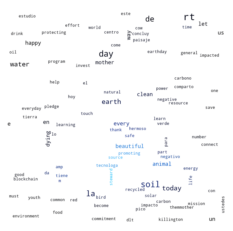

In [97]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = ' '.join(list(df.text_preprocessed))
print(text)
# read the mask / color image taken from
# http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
alice_coloring = np.array(Image.open(path.join(d, "earth_image.jpg")))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
               stopwords=stopwords, max_font_size=40, random_state=42)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

plt.axis("off")
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.show()